In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import numpy as np
from data_gen import get_agent_distribution_and_losses_nels

In [2]:
def get_final_beta(df, gradient_type):
    l = [float(x) for x in list(df[df["gradient_type"]==gradient_type]["final_beta"].item()[1:-1].split(","))]
    arr = np.array(l).reshape(len(l), 1)
    return arr

def get_score_distribution(agent_dist, beta, sigma, q):
    s_eq = agent_dist.quantile_fixed_point_true_distribution(beta, sigma, q)
    scores = agent_dist.best_response_noisy_score_distribution(beta, s_eq, sigma)
    return scores

def get_socio_econ(agent_dist):
    socio_econ = 1/np.array([gamma[0].item() for gamma in agent_dist.types["gammas"]])
    n_socio_econ = socio_econ[agent_dist.n_agent_types]
    normalized_socio_econ = (socio_econ- min(socio_econ))/(max(socio_econ)-min(socio_econ))
    return n_socio_econ, normalized_socio_econ

def get_accepted_scores_by_type(agent_dist, agent_type, scores, cutoff):
    type_indicator = agent_dist.n_agent_types == agent_type
    return scores[type_indicator]

In [4]:
beta_bar = np.ones(9)/np.sqrt(9)
agent_dist, all_types_and_losses, all_labels, _, _, sigma = get_agent_distribution_and_losses_nels(n=5000, n_clusters=8,
                                                                                              prev_beta=beta_bar, 
                                                                                              seed=0)
q=0.7

df = pd.read_csv("results/nels_hrs_work_11-26-22.csv")
df = df[df["seed"] == 0]
#beta_pe = get_final_beta(df, "total_deriv")
#beta_me = get_final_beta(df, "partial_deriv_loss_beta")
beta_naive = get_final_beta(df, "expected_gradient_beta_naive")

In [5]:
beta_naive

array([[0.41447147],
       [0.41662763],
       [0.41620121],
       [0.41719342],
       [0.24938871],
       [0.2284512 ],
       [0.23548134],
       [0.25211666],
       [0.27195968]])

In [6]:
beta_pe

array([[ 0.53415931],
       [ 0.50119019],
       [ 0.46342089],
       [ 0.49759446],
       [-0.0139064 ],
       [ 0.00795557],
       [-0.00449253],
       [-0.01464382],
       [ 0.02513457]])

In [7]:
beta_me

array([[0.42969988],
       [0.41522232],
       [0.39473939],
       [0.40993687],
       [0.26515826],
       [0.23358512],
       [0.24563135],
       [0.24672265],
       [0.27019119]])

In [5]:
def plot_score_dist(ax, agent_dist, beta, sigma, q, title):
    scores = get_score_distribution(agent_dist, beta, sigma, q)
    n_socio_econ, normalized_socio_econ = get_socio_econ(agent_dist)
    colormap = cm.get_cmap('coolwarm', 8)
    colormap = colormap(normalized_socio_econ)
    cutoff = np.quantile(scores, q)
    ax.axvline(x=cutoff, c="black", label="Threshold")

    for i in range(agent_dist.n_types):
        ax.hist(get_accepted_scores_by_type(agent_dist, i, scores, cutoff), alpha=0.7, color=colormap[i])
    ax.set_title(title, fontsize=20)
    ax.legend(fontsize=18)
    #ax.set_xlim(1, 26)
    ax.set_ylim(1, 280)
    ax.set_xlabel("Scores", fontsize=20)
    ax.set_ylabel("Count", fontsize=20)
    return normalized_socio_econ

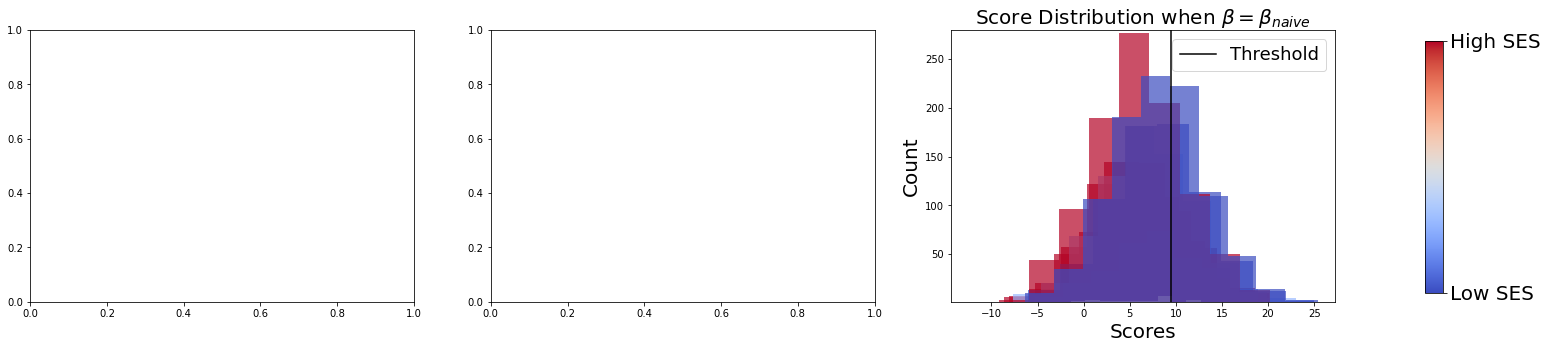

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
#normalized_socio_econ = plot_score_dist(axs[0], agent_dist, beta_pe, sigma, q, "Score Distribution when " +r"$\beta=\beta_{PE}$")
#plot_score_dist(axs[1], agent_dist, beta_me, sigma, q, "Score Distribution when " +r"$\beta=\beta_{ME}$")
normalized_socio_econ = plot_score_dist(axs[2], agent_dist, beta_naive, sigma, q, "Score Distribution when " +r"$\beta=\beta_{naive}$")

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])

norm = matplotlib.colors.Normalize(vmin=min(normalized_socio_econ), vmax=max(normalized_socio_econ))
sm = plt.cm.ScalarMappable(cmap=cm.coolwarm, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, cax=cbar_ax, ticks=[0, 1])
cbar.ax.set_yticklabels(['Low SES', 'High SES'], fontsize=20)
plt.savefig("figs/paper-figure-7.pdf")

        "F22XRSTD",  # READING STANDARDIZED SCORE
        "F22XMSTD",  # MATHEMATICS STANDARDIZED SCORE
        "F22XSSTD",  # SCIENCE STANDARDIZED SCORE
        "F22XHSTD",  # HISTORY/CIT/GEOG STANDARDIZED SCORE
        "F2RHENG2",  # AVERAGE GRADE IN ENGLISH (HS+B)
        "F2RHMAG2",  # AVERAGE GRADE IN MATHEMATICS (HS+B)
        "F2RHSCG2",  # AVERAGE GRADE IN SCIENCE (HS+B)
        "F2RHSOG2",  # AVERAGE GRADE IN SOCIAL STUDIES (HS+B)
        "F2RHFOG2",  # AVERAGE GRADE IN FOREIGN LANG. (HS+B)